# <center>Laboratorium 12<br>Metody Numeryczne</center>    


In [1]:
import main
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi z komentarzami.

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania równań różniczkowych
zwyczajnych. Będziemy rozpatrywać równania różniczkowe postaci
$$\dot{x}(t) = f(x(t), t)$$
gdzie:

$x(t) \in \mathbb{R}^n$,

$t \ge 0$ 


z warunkiem początkowym $x(0) = x0$

Jest to tak zwany problem początkowy (problem Cauchy’ego) dla równań różniczkowych zwyczajnych.

**Zadanie 1.**  
Zaimplementuj metodę *solve_euler* z main.py 

Metoda *solve_euler* z main.py została zaimplementowana. 


***Zadanie 2.*** 

Rozwiąż równanie 
$
\dot{x}(t)=\frac{x+t}{x-t}
$, 

$x(0)=1$ (równanie to posiada rozwiązanie dokładne: 
$x(t)=t+\sqrt{1+2t^2}$). 

Narysuj wykres podanego rozwiązania dokładnego oraz uzyskanych rozwiązań numerycznych.


***Wykres rozwiązania dokładnego:***

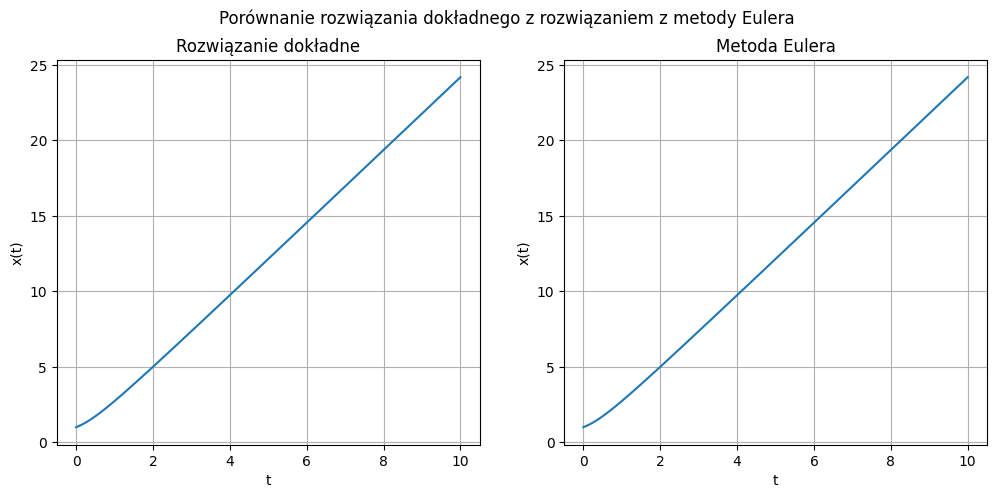

In [2]:

t = np.linspace(0, 10, 10000)
x_prim = lambda t, x: (x+t)/(x-t)
accurate = lambda t: t+np.sqrt(1+2*t**2)
y0 = np.array([1])

plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
ax.plot(t, accurate(t))
ax.grid()
ax.set(xlabel='t', ylabel='x(t)')
plt.title(label='Rozwiązanie dokładne')



ax = plt.subplot(1, 2, 2)
ax.plot(t, main.solve_euler(x_prim,t,y0))
ax.grid()
ax.set(xlabel='t', ylabel='x(t)')
plt.title(label='Metoda Eulera')
plt.suptitle(t='Porównanie rozwiązania dokładnego z rozwiązaniem z metody Eulera')
plt.show()

***Wykres rozwiązania z metody Eulera:***

***Zadanie 3.*** 

Rozwiąż układ równań różniczkowych: 
$$
\begin{array}{l}
\dot{x_1}(t)={x_3}(t)\\
\dot{x_2}(t)={x_4}(t)\\
\dot{x_3}(t)=-\frac{x_1(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}\\
\dot{x_4}(t)=-\frac{x_2(t)}{{(x_1(t)^2+x_2(t)^2)}^{\frac{3}{2}}}
\end{array}
$$
      
z warunkiem początkowym $x(0)=[1,0,0,1]^T$.
    
Dla takiego warunku początkowego układ ten ma rozwiązanie szczególne 
$$
x(t)=\left[\begin{matrix}
cos(t)\\
sin(t)\\
-sin(t)\\
cos(t)
\end{matrix}\right].
$$  

Narysuj wykres podanego rozwiązania szczegółowego oraz uzyskanych rozwiązań numerycznych.

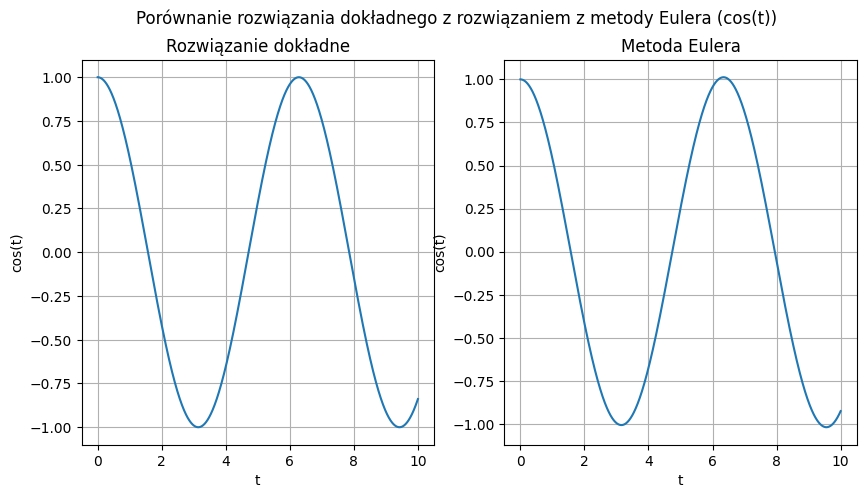

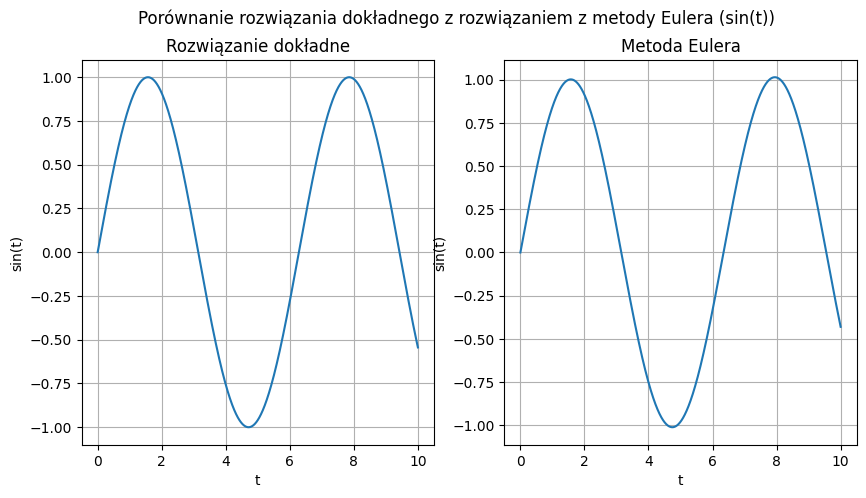

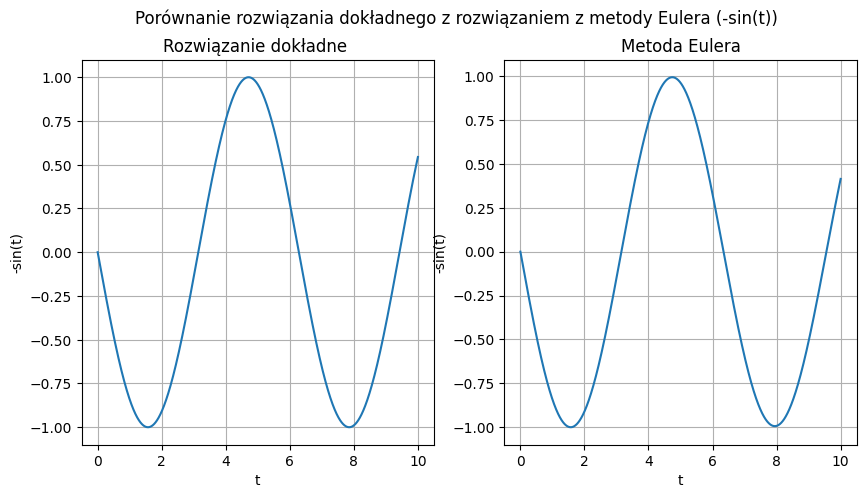

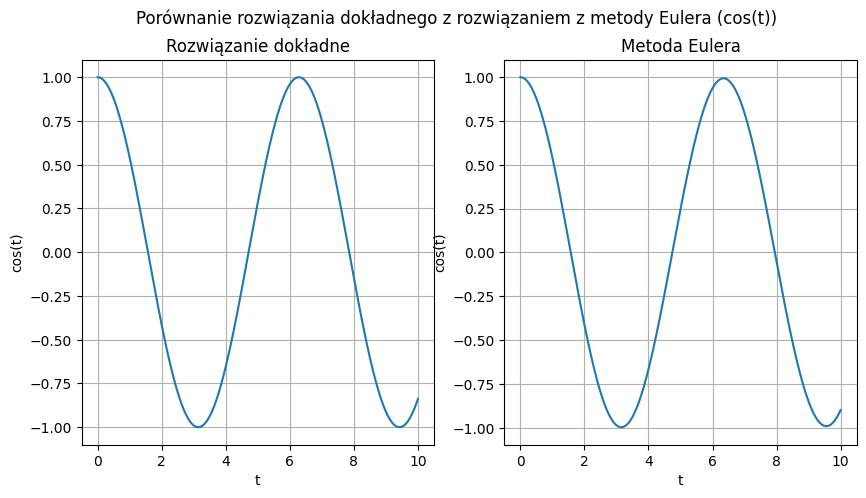

In [3]:
y0 = np.array([[1, 0, 0, 1]])
t = np.linspace(0,10,10000)

def x_prim(t, x):
    x1 = x[2]
    x2 = x[3]
    x3 = -x[0]/np.power(((x[0])**2+(x[1])**2), 1.5)
    x4 = -x[1]/np.power(((x[0])**2+(x[1])**2), 1.5)
    return np.array([[x1, x2, x3, x4]])

result = main.solve_euler(x_prim, t, y0)
result = np.transpose(result)
x1 = result[0]
x2 = result[1]
x3 = result[2]
x4 = result[3]

plt.figure(figsize=(10, 5))
plt.suptitle(t='Porównanie rozwiązania dokładnego z rozwiązaniem z metody Eulera (cos(t))')

ax = plt.subplot(1, 2, 1)
ax.plot(t, np.cos(t))
ax.grid()
ax.set(xlabel='t', ylabel='cos(t)')
plt.title(label='Rozwiązanie dokładne')

ax = plt.subplot(1, 2, 2)
ax.plot(t, x1)
ax.grid()
ax.set(xlabel='t', ylabel='cos(t)')
plt.title(label='Metoda Eulera')

plt.figure(figsize=(10, 5))
plt.suptitle(t='Porównanie rozwiązania dokładnego z rozwiązaniem z metody Eulera (sin(t))')

ax = plt.subplot(1, 2, 1)
ax.plot(t, np.sin(t))
ax.grid()
ax.set(xlabel='t', ylabel='sin(t)')
plt.title(label='Rozwiązanie dokładne')

ax = plt.subplot(1, 2, 2)
ax.plot(t, x2)
ax.grid()
ax.set(xlabel='t', ylabel='sin(t)')
plt.title(label='Metoda Eulera')

plt.figure(figsize=(10, 5))
plt.suptitle(t='Porównanie rozwiązania dokładnego z rozwiązaniem z metody Eulera (-sin(t))')

ax = plt.subplot(1, 2, 1)
ax.plot(t, -np.sin(t))
ax.grid()
ax.set(xlabel='t', ylabel='-sin(t)')
plt.title(label='Rozwiązanie dokładne ')

ax = plt.subplot(1, 2, 2)
ax.plot(t, x3)
ax.grid()
ax.set(xlabel='t', ylabel='-sin(t)')
plt.title(label='Metoda Eulera')

plt.figure(figsize=(10, 5))
plt.suptitle(t='Porównanie rozwiązania dokładnego z rozwiązaniem z metody Eulera (cos(t))')

ax = plt.subplot(1, 2, 1)
ax.plot(t, np.cos(t))
ax.grid()
ax.set(xlabel='t', ylabel='cos(t)')
plt.title(label='Rozwiązanie dokładne')

ax = plt.subplot(1, 2, 2)
ax.plot(t, x4)
ax.grid()
ax.set(xlabel='t', ylabel='cos(t)')
plt.title(label='Metoda Eulera')

plt.show()

***Zadanie 4.*** 

Rozwiąż układ równań $\dot{x}(t)=\mathbf{A}x(t)$, gdzie macierz 
$
\mathbf{A}$ dana jest wzorem:  
$$
\mathbf{A}=\left[\begin{matrix}
-667 & 333 \\
 666 & -334
\end{matrix}\right]
$$

z warynkiem początkowym $x(0)=[0, 3]^T$

Narysuj wykres uzyskanych rozwiązań numerycznych. Jakie jest rozwiązanie dokładne tego równania?

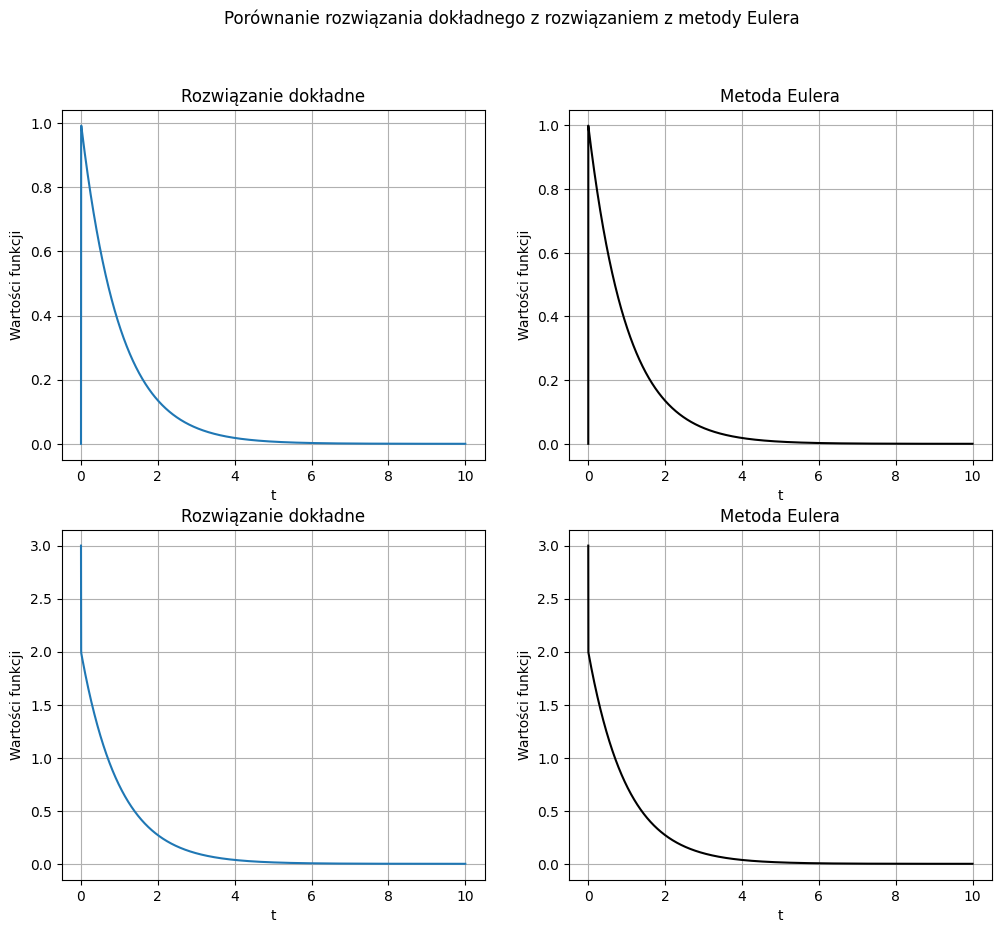

In [6]:

y0 = np.array([[0, 3]])
t = np.linspace(0, 10, 10000)

# obliczone z Wolframa
f1 = lambda t: np.exp(-t) - np.exp(-1000*t)
f2 = lambda t: 2*np.exp(-t) + np.exp(-1000*t)

def x_prim(t, x):
    A = np.array([[-667, 333],[666, -334]])
    res = A@(np.array([x])).T
    res = res.T[0]
    return res

result = main.solve_euler(x_prim, t, y0)
result = result.T
x1 = result[0]
x2 = result[1]

plt.figure(figsize=(12, 10))
plt.suptitle(t='Porównanie rozwiązania dokładnego z rozwiązaniem z metody Eulera')

ax = plt.subplot(2, 2, 1)
ax.plot(t, f1(t))
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='Rozwiązanie dokładne')

ax = plt.subplot(2, 2, 2)
ax.plot(t, x1, 'k')
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='Metoda Eulera')

ax = plt.subplot(2, 2, 3)
ax.plot(t, f2(t))
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='Rozwiązanie dokładne')

ax = plt.subplot(2, 2, 4)
ax.plot(t, x2, 'k')
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='Metoda Eulera')
plt.show()

***Zadanie 5.*** 

Orbita Arenstorfa. Jest to przykład z astronomii opisujący zredukowany problem trzech ciał. Rozważa się dwa ciała o masach $\mu$ i $\mu'=1-\mu$, poruszające się w ruchu kołowym na jednej płaszczyźnie oraz ciało o pomijalnej masie poruszające się między nimi w tej samej płaszczyźnie. Dany jest układ równań różniczkowych:
$$
\begin{array}{l}
\dot{x_1}(t)={x_2}(t)\\
\dot{x_2}(t)={x_1}(t)+2x_4(t)-\mu'\frac{x_1+\mu}{D_1}-\mu\frac{x_1-\mu'}{D_2}\\
\dot{x_3}(t)=x_4(t)\\
\dot{x_4}(t)=x_3(t)-2x_2(t)-\mu'\frac{x_3(t)}{D_1}
-\mu\frac{x_3(t)}{D_2}\end{array}.
$$

gdzie
$$
\begin{array}{l}
D_1=((x_1(t)+\mu)^2+{x_3}^2(t))^\frac{3}{2}\\
D_2=((x_1(t)-\mu')^2+{x_3}^2(t))^\frac{3}{2}\\
\mu=0.012277471\end{array}.
$$

Zmienne $x_1$ i $x_3$ odpowiadają za współrzędne na płaszczyźnie trzeciego ciała zaś $x_2$ i $x_4$
są odpowiednio prędkościami. Warto zwrócić uwagę, że zarówno czas jak i masa zostały
w równaniach przeskalowane, i nie mają bezpośredniej interpretacji fizycznej, należy je
traktować jako zmienne bezwymiarowe. Dla pewnych warunków początkowych i czasu
symulacji
$$
\begin{array}{l}
x_1(0) = 0.994\\
x_2(0) = 0\\
x_3(0) = 0\\
x_4(0) = − 2.00158510637908252240537862224\\
T = 17.0652165601579625588917206249.\end{array}
$$
dokładne rozwiązanie tych równań jest okresowe ($x(0)=x(T)$).

Narysuj wykres uzyskanych rozwiązań numerycznych.

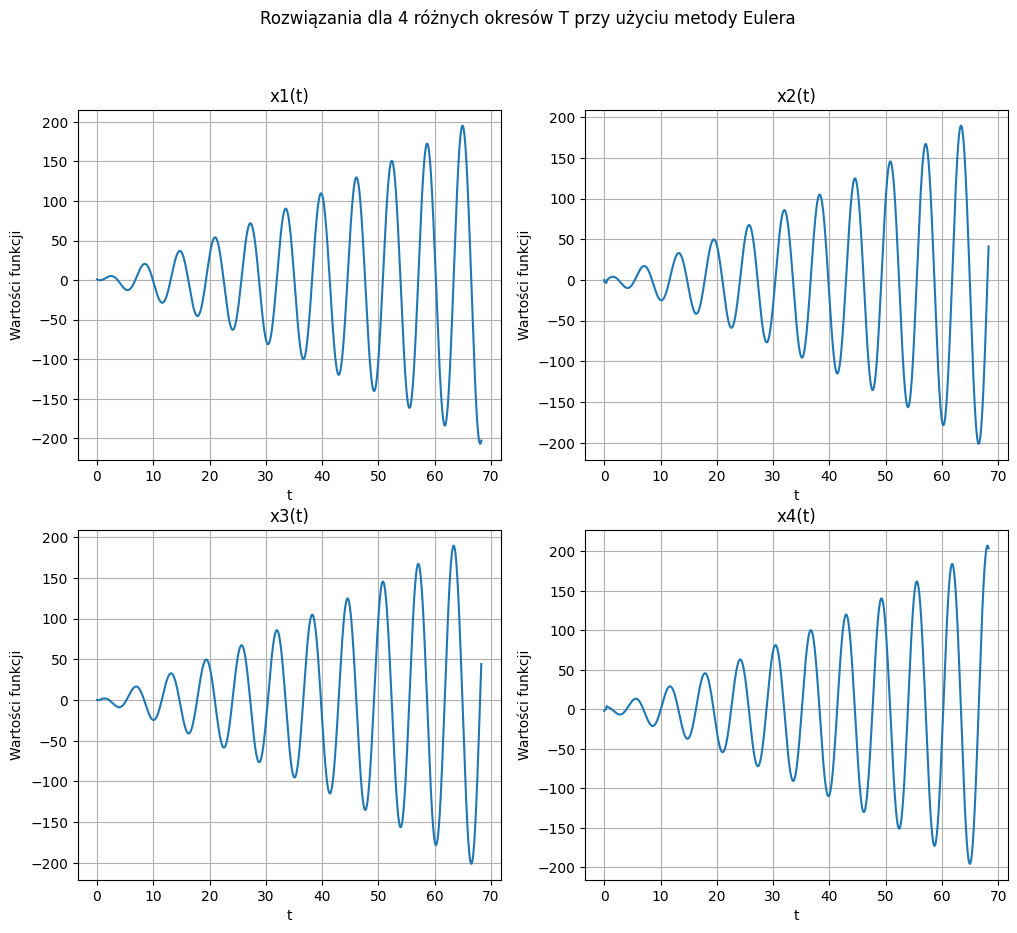

In [8]:
u = 0.012277471
u_prim = 1-u
y0 = np.array([[0.994, 0, 0, -2.00158510637908252240537862224]], dtype=object)
T = 17.0652165601579625588917206249
t = np.linspace(0, 4*T, 10000)

def x_prim(t, x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    D1 = np.power((x1+u)**2 + x3**2, 1.5)
    D2 = np.power((x1-u_prim)**2 + x3**2, 1.5)
    x1_return = x2
    x2_return = x1 + 2*x4 - u_prim*(x1+u)/D1-u*(x1-u_prim)/D2
    x3_return = x4
    x4_return = x3 - 2*x2 - u_prim*x3/D1 - u*x3/D2
    return np.array([x1_return, x2_return, x3_return, x4_return], dtype=object)

result = main.solve_euler(x_prim, t, y0)
result = np.transpose(result)
x1 = result[0]
x2 = result[1]
x3 = result[2]
x4 = result[3]

plt.figure(figsize=(12, 10))
plt.suptitle(t='Rozwiązania dla 4 różnych okresów T przy użyciu metody Eulera')

ax = plt.subplot(2, 2, 1)
ax.plot(t, x1)
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='x1(t)')

ax = plt.subplot(2, 2, 2)
ax.plot(t, x2)
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='x2(t)')

ax = plt.subplot(2, 2, 3)
ax.plot(t, x3)
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='x3(t)')

ax = plt.subplot(2, 2, 4)
ax.plot(t, x4)
ax.grid()
ax.set(xlabel='t', ylabel='Wartości funkcji')
plt.title(label='x4(t)')

plt.show()

# Wnioski:
Metoda Eulera nie była dla mnie nowym zagadnieniem, gdyż została wykorzystywałem ją już na innych przedmiotach. Nie należy ona do optymalnych metod rozwiązywania równań różniczkowych, ponieważ uzyskanie dobrego wyniku odbywa się dużym zużyciem pamięci i czasem obliczeń. Tą zależność najlepiej widać w ostatnim zadaniu.

**Bibliografia**

1. J. C. Butcher. Numerical Methods for Ordinary Differential Equations. John Wiley and Sons, Ltd., 2003.
2. Z. Fortuna, B. Macukow, and J. Wąsowski. Metody numeryczne. WNT Warszawa, 1982.
3. E. Hairer, S.P. Nørsett, and G. Wanner. Solving Ordinary Differential Equations: I Nonstiff problems. Springer, 2 edition, 2000.
4. W. Mitkowski. Równania macierzowe i ich zastosowania. Wydawnictwa AGH, Kraków,2 edition, 2007.
5. A. Ralston. Wstęp do analizy numerycznej. PWN, Warszawa, 1965.
6. L. F. Shampine, I. Gladwell, and S. Thompson. Solving ODEs with MATLAB. Cambridge University Press, 2003.
7. Stoer, J., Burlirsch, R., 1980: Wstêp do metod numerycznych, tom 2. PWN Warszawa.
